In [15]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import division
from operator import truediv
import copy
import random

In [16]:
from matplotlib.gridspec import GridSpec
cmap = plt.cm.coolwarm  #This sets what color palatte we are using

line_colors = cmap(np.linspace(0,1,20)) #this makes a list of colors to assign our lines to

In [17]:
#Adapted from http://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar
#This function just plots an array in a discrete color plot
def discrete_matshow(data):
    #get discrete colormap
    cmap = plt.cm.coolwarm
    # set limits .5 outside true range
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data), vmax = np.max(data))
    #tell the colorbar to tick at integers
    cax = plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1))


In [18]:
#This function initializes an LxL array with a 5x5 square in the middle with a value set at 1
def Vsquare(L):
    V = np.zeros((L,L))
    for i in range(int((L-5)/2),int((L-(L-5)/2))):
        for j in range(int((L-5)/2),int((L-(L-5)/2))):
            V[i][j] = 1
    return V

In [39]:
V = Vsquare(15+40)

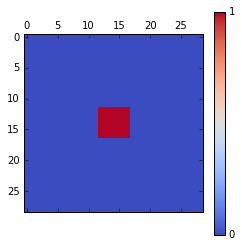

In [41]:
discrete_matshow(V)
#plt.savefig('15x15initialexample', bbox_inches='tight', dpi = 1000)

In [19]:
#This function uses the Jacobi method to calculate the basic 15x15 model in any odd size array with sidelength
#greater than 15.
def small_square_update(V, L):
    dV =0
    Vn = np.copy(V)   #it's important to copy the array, else we won't be using the Jacobi method, which isn't bad,
                      #but we're using the jacobi method here
    for j in range(int((L-15)/2+1),int(L-(L-15)/2 -1)):
        if((j < (L-5)/2) or j >(L - (L-5)/2 - 1)):
            for i in range(int((L-15)/2+1),int(L+(-(L-15)/2) -1)):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
        if(j> (L-5)/2-1 or j <(L - (L-5)/2)+1 ):
            for i in range(int((L-15)/2 + 1),int((L-5)/2)):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
            for i in range(int((L - (L-5)/2) ),int(L-((L-15)/2)-1)):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
    return Vn, dV
    

In [20]:
#This function calls the above function and iterates the jacobi method over a set number of times
def laplace_calculate_sm_sq(V, L, N):
    i=0
    dVmin = (L**2)*10**-(5)
    dV=100.
    while (i<N or dV > dVmin):
        V, dV = small_square_update(V, L)
        i=i+1
    return V

In [40]:
Vex = laplace_calculate_sm_sq(V, 15+40, 10*23)

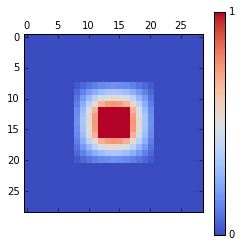

In [44]:
discrete_matshow(Vex)
#plt.savefig('15x15_in_29x29_relaxed_ex.png', bbox_inches='tight', dpi = 1000)

In [21]:
#This function is like the small square update, but instead updates it for the whole array
#not just the 15x15 grid
def big_square_update(V, L):
    dV =0
    Vn = np.copy(V)
    for j in range(1, L-1):
        if(j<(L-5)/2 or j>(L-(L-5)/2)-1):
            for i in range(1, L-1):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
        if(j>(L-5)/2-1 and j<(L-(L-5)/2)):
            for i in range(1, int((L-5)/2)):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
            for i in range(int(L-(L-5)/2),L-1):
                Vn[j][i] = (V[j][i-1] + V[j][i+1] + V[j+1][i] + V[j-1][i])/4
                dV = dV+ np.abs(V[j][i]-Vn[j][i])
    return Vn, dV

In [22]:
def laplace_calculate_bg_sq(V, L, N):
    i=0
    dVmin = (L**2)*10**-(5)
    dV=100.
    while (i<N or dV > dVmin):
        Vn, dV = big_square_update(V, L)
        V, dV = big_square_update(Vn, L)
        i=i+1
    return V

In [11]:
Vbig = Vsquare(14+15)

In [12]:
Vbigex = laplace_calculate_bg_sq(Vbig, 14+15, 29*29*10)

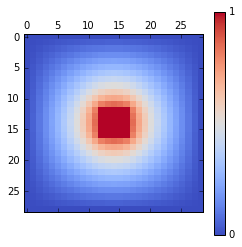

In [39]:
discrete_matshow(Vbigex)
#plt.savefig('29x29_relaxed_full_example.png', bbox_inches='tight', dpi = 1000)

In [23]:
#This function outputs an array that shows how our overall convergence changes with the
#number of iterations we take our jacobi method to
def iteration_affect(L, Nmin, Nmax):
    dV = np.zeros((Nmax-Nmin))
    j = 0
    for n in np.arange(Nmin, Nmax, 1):
        A = Vsquare(L)
        i=0
        while (i<n):
            A, dA = big_square_update(A, L)
            i=i+1
        dV[j] = dA
        j = j+1
    return dV

In [51]:
convergence_with_iterations = np.zeros((11,99))
i = 0
for l in np.arange(15, 22+15, 2):
    print(i)
    convergence_with_iterations[i][:] =iteration_affect(l, 1, 100)
    i = i+1

0
1
2
3
4
5
6
7
8
9
10


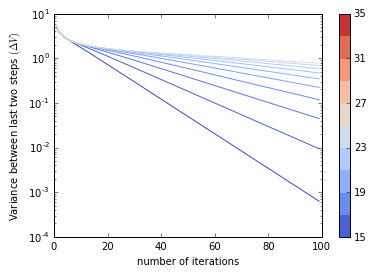

In [58]:
#used http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots to make most of legend
Z = [[0,0],[0,0]]
levels = np.arange(15,22+15,2)
CS3 = plt.contourf(Z, levels, cmap=cmap)
plt.ticklabel_format(axis='CS3', style='sci')
plt.clf()


for i in range(0,10):
    plt.semilogy(np.arange(1,100,1), convergence_with_iterations[i],color=line_colors[i])


plt.ylabel(r'Variance between last two steps $(\Delta V)$')
plt.xlabel(r'number of iterations')
plt.colorbar(CS3)
#plt.savefig('convergence_over_many_sizes.png', bbox_inches='tight', dpi = 1000)

plt.show()

In [33]:
#This function shows how a specific point in our 15x15 grid varies as we scale up the size of the larger grid
#The point used is [3][4]
def size_affect(Lmin, Lmax, N):
    Ll = np.zeros((4,int((Lmax - Lmin)/2)))

    h = 0
    j = 0
    for l in np.arange(Lmin,Lmax,2):
        A = Vsquare(l)
        i=0
        dA = 1000
        while(dA > l**2 * 10**-5):
            A, dA = big_square_update(A,l)
            i = i+1
        Ll[0][j] = A[int((l-15)/2+7)][int((l-15)/2+1)]   #This is where we decide which point to use, now it is 3, 4
        Ll[1][j] = A[int((l-15)/2+7)][int((l-15)/2+2)]
        Ll[2][j] = A[int((l-15)/2+7)][int((l-15)/2+3)]
        Ll[3][j] = A[int((l-15)/2+7)][int((l-15)/2+4)]
        j= j +1

    h = h + 1
    return Ll

In [51]:
SA = size_affect(15, 15+40, 300)

In [71]:
small = np.zeros(int((40)/2))
small[:] = Vex[27][21]

In [87]:
print(small)

[ 0.75284962  0.75284962  0.75284962  0.75284962  0.75284962  0.75284962
  0.75284962  0.75284962  0.75284962  0.75284962  0.75284962  0.75284962
  0.75284962  0.75284962  0.75284962  0.75284962  0.75284962  0.75284962
  0.75284962  0.75284962]


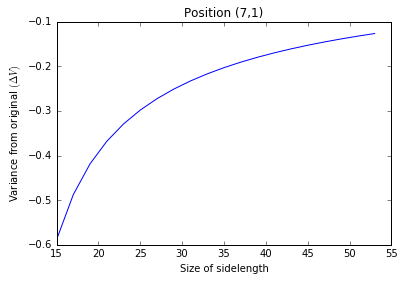

In [80]:
plt.plot(np.arange(15, 15+40, 2), SA[0]-small)

plt.title('Position (7,1)')
plt.ylabel(r'Variance from original $(\Delta V)$')
plt.xlabel(r'Size of sidelength')
#plt.savefig('size_change_7_1.png', bbox_inches='tight', dpi = 1000)

plt.show()

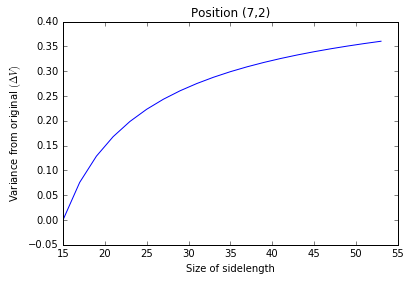

In [81]:
small = np.zeros(int((40)/2))
small[:] = Vex[27][22]

plt.plot(np.arange(15, 15+40, 2), SA[1]-small)

plt.title('Position (7,2)')
plt.ylabel(r'Variance from original $(\Delta V)$')
plt.xlabel(r'Size of sidelength')
#plt.savefig('size_change_7_2.png', bbox_inches='tight', dpi = 1000)

plt.show()

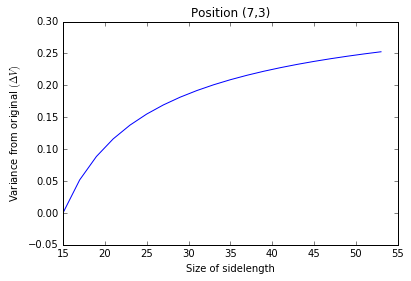

In [82]:
small = np.zeros(int((40)/2))
small[:] = Vex[27][23]
plt.plot(np.arange(15, 15+40, 2), SA[2]-small)

plt.title('Position (7,3)')
plt.ylabel(r'Variance from original $(\Delta V)$')
plt.xlabel(r'Size of sidelength')
#plt.savefig('size_change_7_3.png', bbox_inches='tight', dpi = 1000)

plt.show()

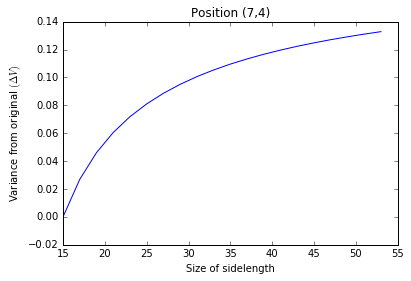

In [83]:
small = np.zeros(int((40)/2))
small[:] = Vex[27][24]
plt.plot(np.arange(15, 15+40, 2), SA[3]-small)

plt.title('Position (7,4)')
plt.ylabel(r'Variance from original $(\Delta V)$')
plt.xlabel(r'Size of sidelength')
#plt.savefig('size_change_7_4.png', bbox_inches='tight', dpi = 1000)

plt.show()

In [9]:
#This function does the same as Vsquare, and makes an LxL grid where the B.C.s are set at their usual values of 
#1 and 0, but we vary the initial conditions of the inner grid
def ic_Vsquare(L, avg):
    V = avg * np.ones((L,L))
    
    for i in range(int((L-5)/2),int((L-(L-5)/2))):
        for j in range(int((L-5)/2),int((L-(L-5)/2))):
            V[i][j] = 1
    
    for i in range(0, L):
        if (i == 0 or i == L-1):
            for j in range (0,L):
                V[i][j] = 0
        else:
            V[i][0] = 0
            V[i][L-1] = 0
    return V

In [10]:
#This function generates the array of how many iterations it takes to get to our convergence goal depending on our starting value
def initial_condition_var(L, avgmin, avgmax, dVmin):
    N = np.zeros(int((avgmax - avgmin)/.01))
    i = 0
    for avg in np.arange(avgmin, avgmax, .01):
        V = ic_Vsquare(L, avg)
        dV = 100
        n = 0
        while (dV> dVmin or n<10):
            V, dV = big_square_update(V,L)
            n = n+1
        N[i] = n
        i=i+1
    return N

In [84]:
icv = initial_condition_var(15+40, 0, 1, (15+30)**2 * 10**-5)

In [85]:
len(icv)

100

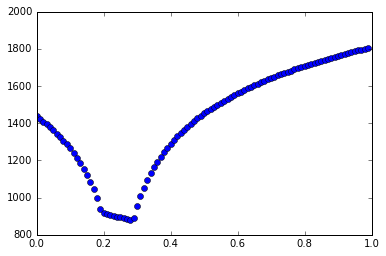

In [88]:
plt.plot(np.arange(0,1,.01), icv,'o')
plt.savefig('vary_initial.png', bbox_inches='tight', dpi = 1000)
plt.show()

In [11]:
def rand_Vsquare(L):
    V = np.random.random((L,L))
    
    for i in range(int((L-5)/2),int((L-(L-5)/2))):
        for j in range(int((L-5)/2),int((L-(L-5)/2))):
            V[i][j] = 1
    
    for i in range(0, L):
        if (i == 0 or i == L-1):
            for j in range (0,L):
                V[i][j] = 0
        else:
            V[i][0] = 0
            V[i][L-1] = 0
    return V

In [12]:
def rand_condition_var(L, dVmin):
    i = 0
    DV=np.zeros(850)
    V = rand_Vsquare(L)
    dV = 100
    n = 0
    while (dV> dVmin or n<10):
        V, dV = big_square_update(V,L)
        n = n+1
        DV[i] = dV
        i = i+1
    return n

In [93]:
rand_condition_var(15+14, (15+14)**2*10**-5)

460